In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from data_processing import process_data

Creo la serie de tiempo para cada cajero.

In [2]:
#Escrea las primeras n+1 series de tiempo
process_data(n = 15)

Todos los archivos fueron guardados en la carpeta 'data_processed'.


<Figure size 1200x600 with 0 Axes>

Veamos algun ejemplo.

In [1]:
nro_cajero = 2
df = pd.read_csv(f'data_processed/df_resultado_cajero_{nro_cajero}.csv')

df['FECHA'] = pd.to_datetime(df['FECHA'])
df.head()

NameError: name 'pd' is not defined

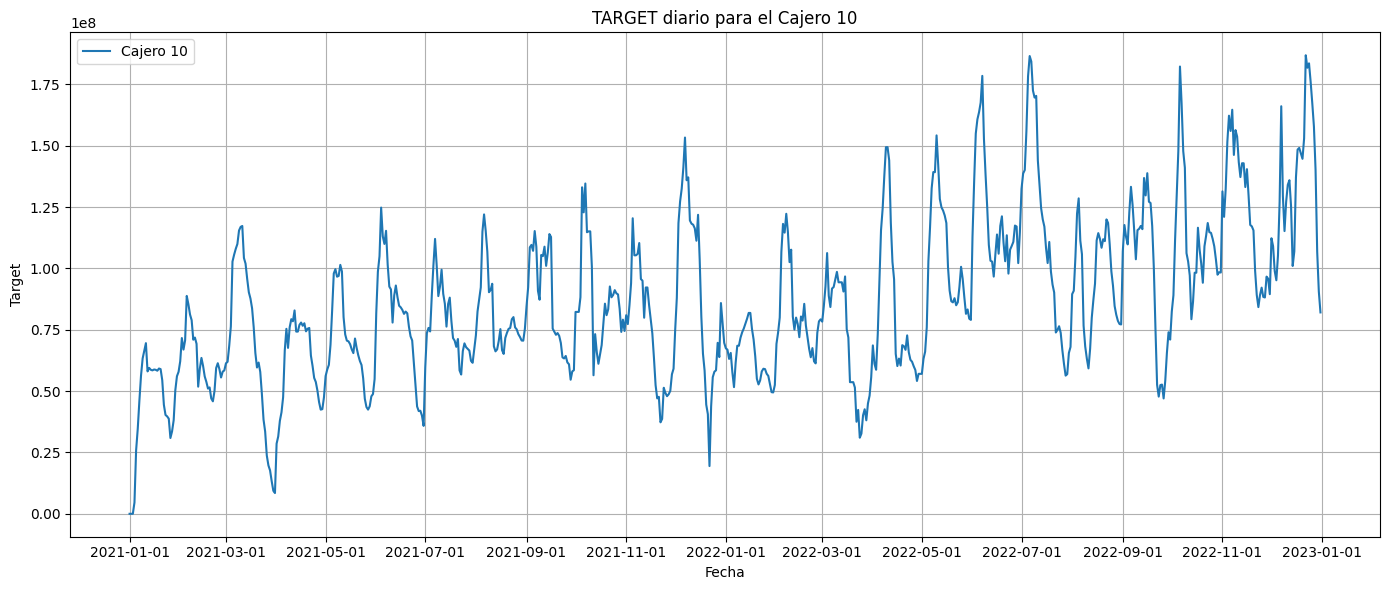

In [11]:
# Plotear
plt.figure(figsize=(14, 6))
plt.plot(df['FECHA'], df['TARGET'], label=f'Cajero {nro_cajero}')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #Ajuste en el formato de fecha

plt.title(f'TARGET diario para el Cajero {nro_cajero}')
plt.xlabel('Fecha')
plt.ylabel('Target')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()